# Zomato_Rating_prediction

## Problem Statement:

Zomato is one of the best online food delivery apps which gives the users the ratings and the reviews on restaurants all over india.These ratings and the Reviews are considered as one of the most important deciding factors which determine how good a restaurant is.

We will therefore use the real time Data set with variuos features a user would look into regarding a restaurant. We will be considering Banglore City in this analysis.

The main agenda of this project is:

Perform extensive Exploratory Data Analysis(EDA) on the Zomato Dataset.
Build an appropriate Machine Learning Model that will help various Zomato Restaurants to predict their respective Ratings based on certain features DEPLOY the Machine learning model via Flask that can be used to make live predictions of restaurants ratings

## Feature Engineering Steps:

Handle missing values
Encode categorical data into numerical data 
Feature importance ==> heatmap, extratreeregressor
Splitting ==> train & test dataset
Apply models
Serialization/saving our model into pickle file
Deployment using Flask framework ==> other servers like(heroku,aws,azure,google cloud)

# Importing Basic Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mpl

# Importing Dataset

In [2]:
df = pd.read_csv('zomato.csv')
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [3]:
df.columns         # It can represents all column names

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [4]:
df.dtypes                   # it can returns a series with the data type of each column

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

# Describe()
The describe() method is used for calculating some statistical data like percentile,mean,std,min,max. of the numerical values of the series

In [5]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [6]:
df.shape

(51717, 17)

# Finding Unique values :: Value_Counts

In [7]:
df['name'].value_counts()

Cafe Coffee Day       96
Onesta                85
Just Bake             73
Empire Restaurant     71
Five Star Chicken     70
                      ..
Ur Cutlet Factory      1
A1 Tasty Lime Rice     1
Nimmoora Thindi        1
Sri Maruthi Hotel      1
Tea Garden             1
Name: name, Length: 8792, dtype: int64

In [8]:
df['online_order'].value_counts()

Yes    30444
No     21273
Name: online_order, dtype: int64

In [9]:
df['book_table'].value_counts()

No     45268
Yes     6449
Name: book_table, dtype: int64

In [10]:
# Index :: rename

df = df.rename(columns={'approx_cost(for two people)':'cost', 'listed_in(type)':'type', 'listed_in(city)':'city'})

In [11]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [12]:
df['cost'].value_counts()

300      7576
400      6562
500      4980
200      4857
600      3714
         ... 
60          1
5,000       1
469         1
560         1
3,700       1
Name: cost, Length: 70, dtype: int64

In [13]:
df['type'].value_counts()

Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: type, dtype: int64

In [14]:
df['city'].value_counts()

BTM                      3279
Koramangala 7th Block    2938
Koramangala 5th Block    2836
Koramangala 4th Block    2779
Koramangala 6th Block    2623
Jayanagar                2371
JP Nagar                 2096
Indiranagar              1860
Church Street            1827
MG Road                  1811
Brigade Road             1769
Lavelle Road             1744
HSR                      1741
Marathahalli             1659
Whitefield               1620
Residency Road           1620
Bannerghatta Road        1617
Brookefield              1518
Old Airport Road         1425
Kammanahalli             1329
Kalyan Nagar             1309
Basavanagudi             1266
Sarjapur Road            1261
Electronic City          1229
Bellandur                1227
Frazer Town              1185
Malleshwaram             1096
Rajajinagar              1079
Banashankari              863
New BEL Road              740
Name: city, dtype: int64

# Feature Engineering

## Finding missing values

In [15]:
df.isnull().sum()

url                 0
address             0
name                0
online_order        0
book_table          0
rate             7775
votes               0
phone            1208
location           21
rest_type         227
dish_liked      28078
cuisines           45
cost              346
reviews_list        0
menu_item           0
type                0
city                0
dtype: int64

<AxesSubplot:>

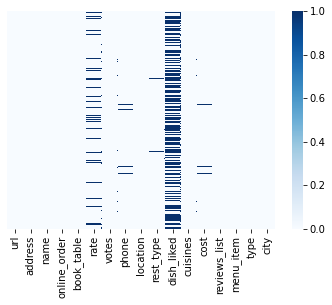

In [16]:
sb.heatmap(df.isnull(), cmap = 'Blues',yticklabels = False)

## Using Fillna()
The fillna() function is used to fill NA/NaN values using the specified method

In [17]:
df.rate.fillna("Not Mentioned", inplace=True)
df.phone.fillna("Not Mentioned", inplace=True)
df.location.fillna("Not Mentioned", inplace=True)
df.rest_type.fillna("Not Mentioned", inplace=True)
df.dish_liked.fillna("Not Mentioned", inplace=True)
df.cuisines.fillna("Not Mentioned", inplace=True)
df.cost.fillna("Not Mentioned", inplace=True)

In [18]:
df.isnull().sum()

url             0
address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
phone           0
location        0
rest_type       0
dish_liked      0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
city            0
dtype: int64

In [19]:
df.shape

(51717, 17)

## Dropping Unwanted columns

In [20]:
df = df.drop(['url','address','phone'],axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [21]:
df.shape

(51717, 14)

In [22]:
df.duplicated().sum()         # Duplicated means it returns repeated rows in the dataset

63

In [23]:
df.drop_duplicates(inplace = True)

In [24]:
df.duplicated().sum()

0

## Cleaning the Data

In [25]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', 'Not Mentioned',
       '1,400', '180', '1,350', '2,200', '2,000', '1,800', '1,900', '330',
       '2,500', '2,100', '3,000', '2,800', '3,400', '40', '1,250',
       '3,500', '4,000', '2,400', '2,600', '120', '1,450', '469', '70',
       '3,200', '60', '560', '240', '360', '6,000', '1,050', '2,300',
       '4,100', '5,000', '3,700', '1,650', '2,700', '4,500', '140'],
      dtype=object)

In [26]:
df = df.loc[df.cost != 'Not Mentioned']

In [27]:
df['cost'] = df['cost'].apply(lambda x : x.replace(',',''))

In [28]:
df['cost'] = df['cost'].astype(float)

In [29]:
df['cost'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [30]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', 'Not Mentioned', '2.6/5',
       '3.8 /5', '3.4/5', '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5',
       '2.2/5', '2.3/5', '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5',
       '4.2 /5', '4.0 /5', '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5',
       '3.3 /5', '2.8 /5', '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5',
       '2.6 /5', '4.5 /5', '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5',
       '1.8/5', '4.6 /5', '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5',
       '4.7 /5', '2.4 /5', '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'],
      dtype=object)

In [31]:
df = df.loc[df.rate != 'NEW']
df = df.loc[df.rate != 'Not Mentioned']
df = df.loc[df.rate != '-']

In [32]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5', '4.5/5',
       '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '3.4 /5',
       '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5',
       '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5', '3.5 /5',
       '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5', '4.3 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5',
       '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [33]:
df['rate'] = df['rate'].apply(lambda x : x.replace('/5', ''))

In [34]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [35]:
df['rate'] = df['rate'].astype(float)

In [36]:
df.dtypes

name             object
online_order     object
book_table       object
rate            float64
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

# Exploratory Data Analysis

In [37]:
# Setting style for the plots and also background

mpl.style.use('fivethirtyeight')
sb.set_style('whitegrid')

## Which restaurant has highest outlets in Bangaluru?

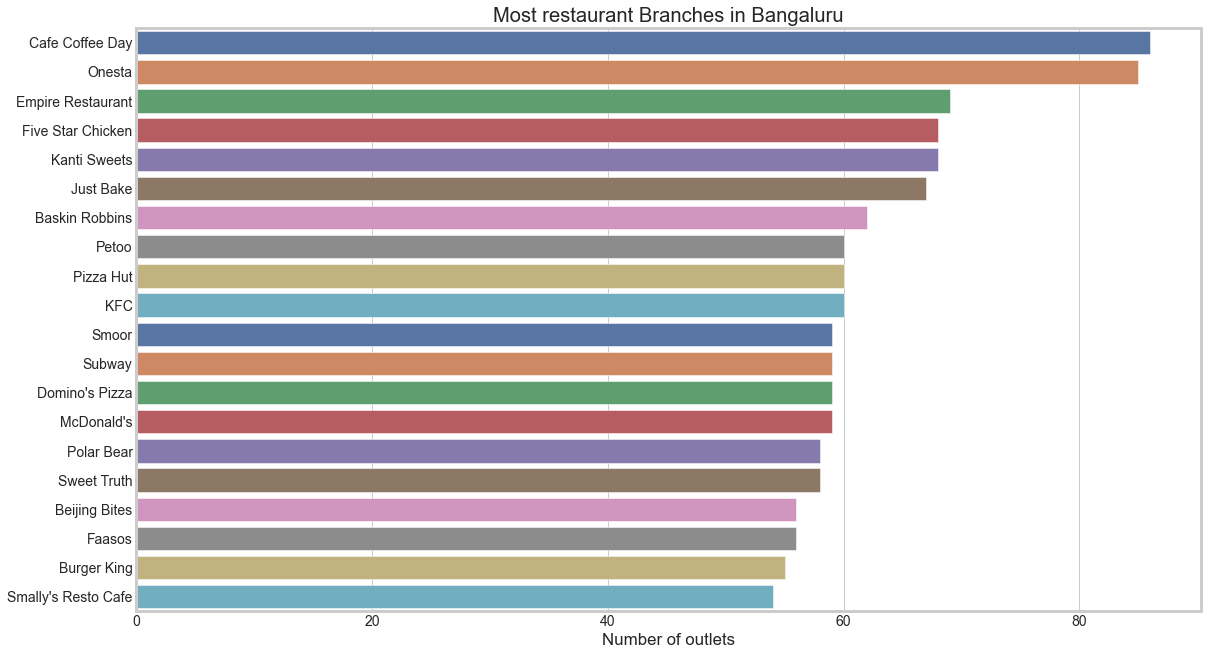

In [38]:
mpl.figure(figsize=(17,10))
#colours =['m','r','c','g','y','c']
outlets=df['name'].value_counts()[:20]
sb.barplot(x=outlets,y=outlets.index,palette='deep')
mpl.title("Most restaurant Branches in Bangaluru")
mpl.xlabel("Number of outlets")
mpl.show()

## How many of the restuarants do not accept online orders?


In [39]:
df.online_order.value_counts()

Yes    27177
No     14204
Name: online_order, dtype: int64

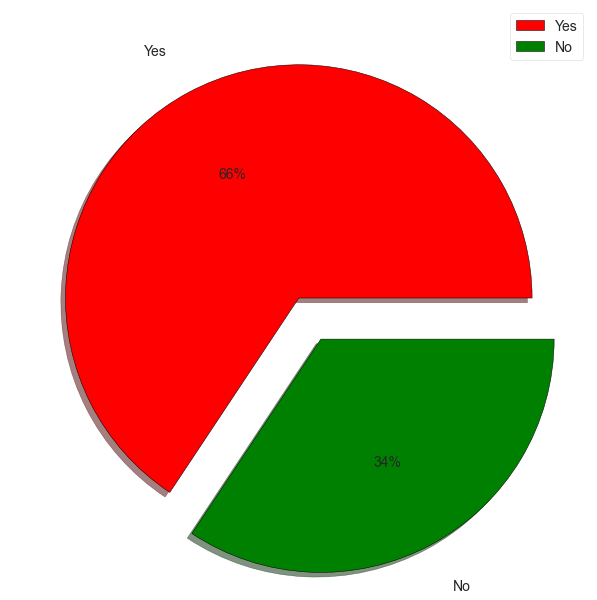

In [40]:
x=df['online_order'].value_counts()
colors = ['red', 'green']

mpl.figure(figsize=(10,10))

mpl.pie(x, labels=x.index, colors = colors,
        wedgeprops={'edgecolor':'black'},
        autopct='%1.0f%%',
        explode = [0,0.2],
        labeldistance=1.2, 
        shadow=True)

mpl.legend()
mpl.show()

## Whether restaurant offer Table booking or not

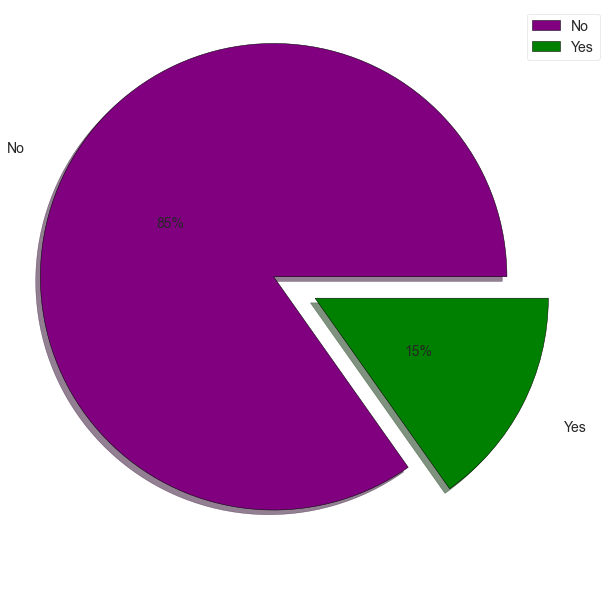

In [41]:
x=df['book_table'].value_counts()
colors = ['purple', 'green']

mpl.figure(figsize=(10,10))

mpl.pie(x, labels=x.index,
        wedgeprops={'edgecolor':'black'},
        autopct='%1.0f%%', 
        explode = [0.2,0], colors=colors,
        pctdistance=.5, labeldistance=1.2,shadow=True)

mpl.legend()
mpl.show()

## Whether Restaurants deliver online or Not

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


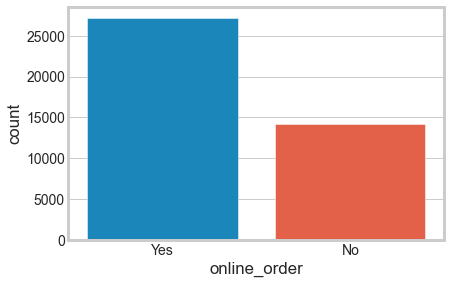

In [42]:
# Restaurants delivering Online or not

sb.countplot(df['online_order'])
mpl.show()

## Rating Distributions

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


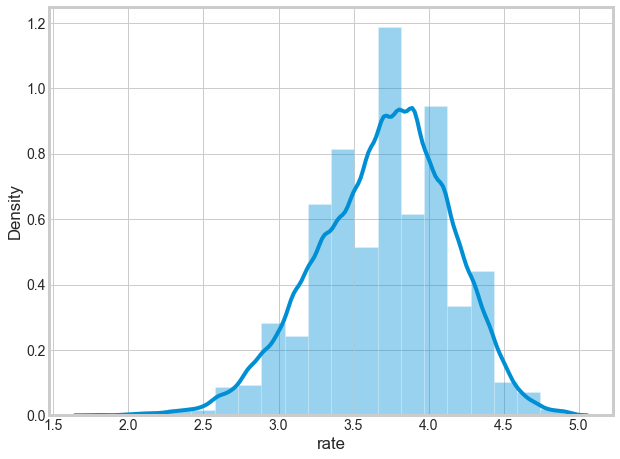

In [43]:
# How ratings are distributed

mpl.figure(figsize=(9,7))

sb.distplot(df['rate'],bins=20)
mpl.show()

## Distributions of cost for two people

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


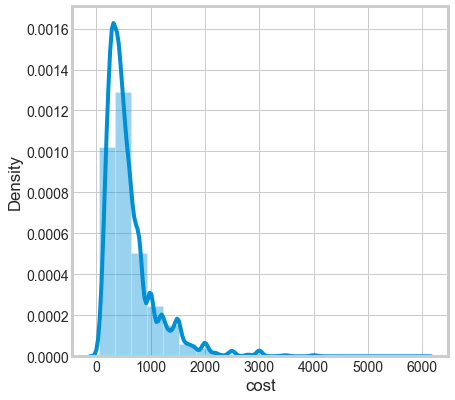

In [44]:
mpl.figure(figsize=(6,6))
sb.distplot(df['cost'], bins=20)
mpl.show()

## Most Common Restaurant Types

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


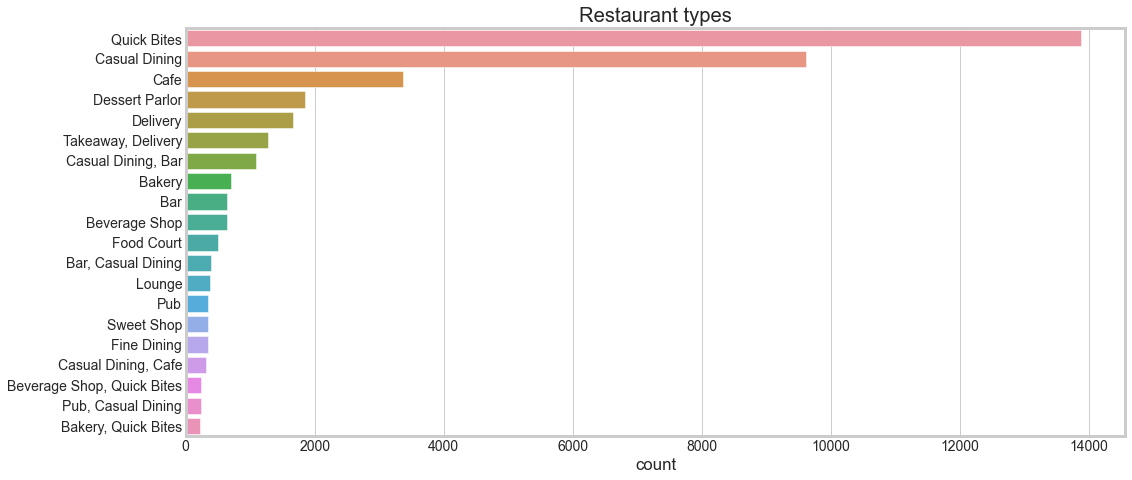

In [45]:
mpl.figure(figsize=(15,7))
rest=df['rest_type'].value_counts()[:20]
sb.barplot(rest,rest.index)
mpl.title("Restaurant types")
mpl.xlabel("count")
mpl.show()

## Cost Factor

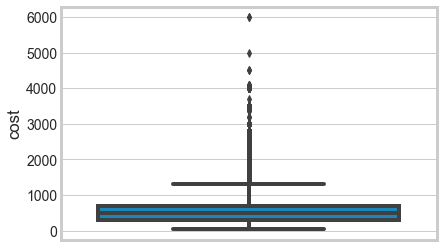

In [46]:
sb.boxplot(y='cost',data=df)
mpl.show()

## No. of restaurants in a particular location

In [47]:
df.location.value_counts()

BTM                      3900
Koramangala 5th Block    2296
HSR                      2004
Indiranagar              1803
JP Nagar                 1717
                         ... 
Yelahanka                   4
West Bangalore              3
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: location, Length: 92, dtype: int64

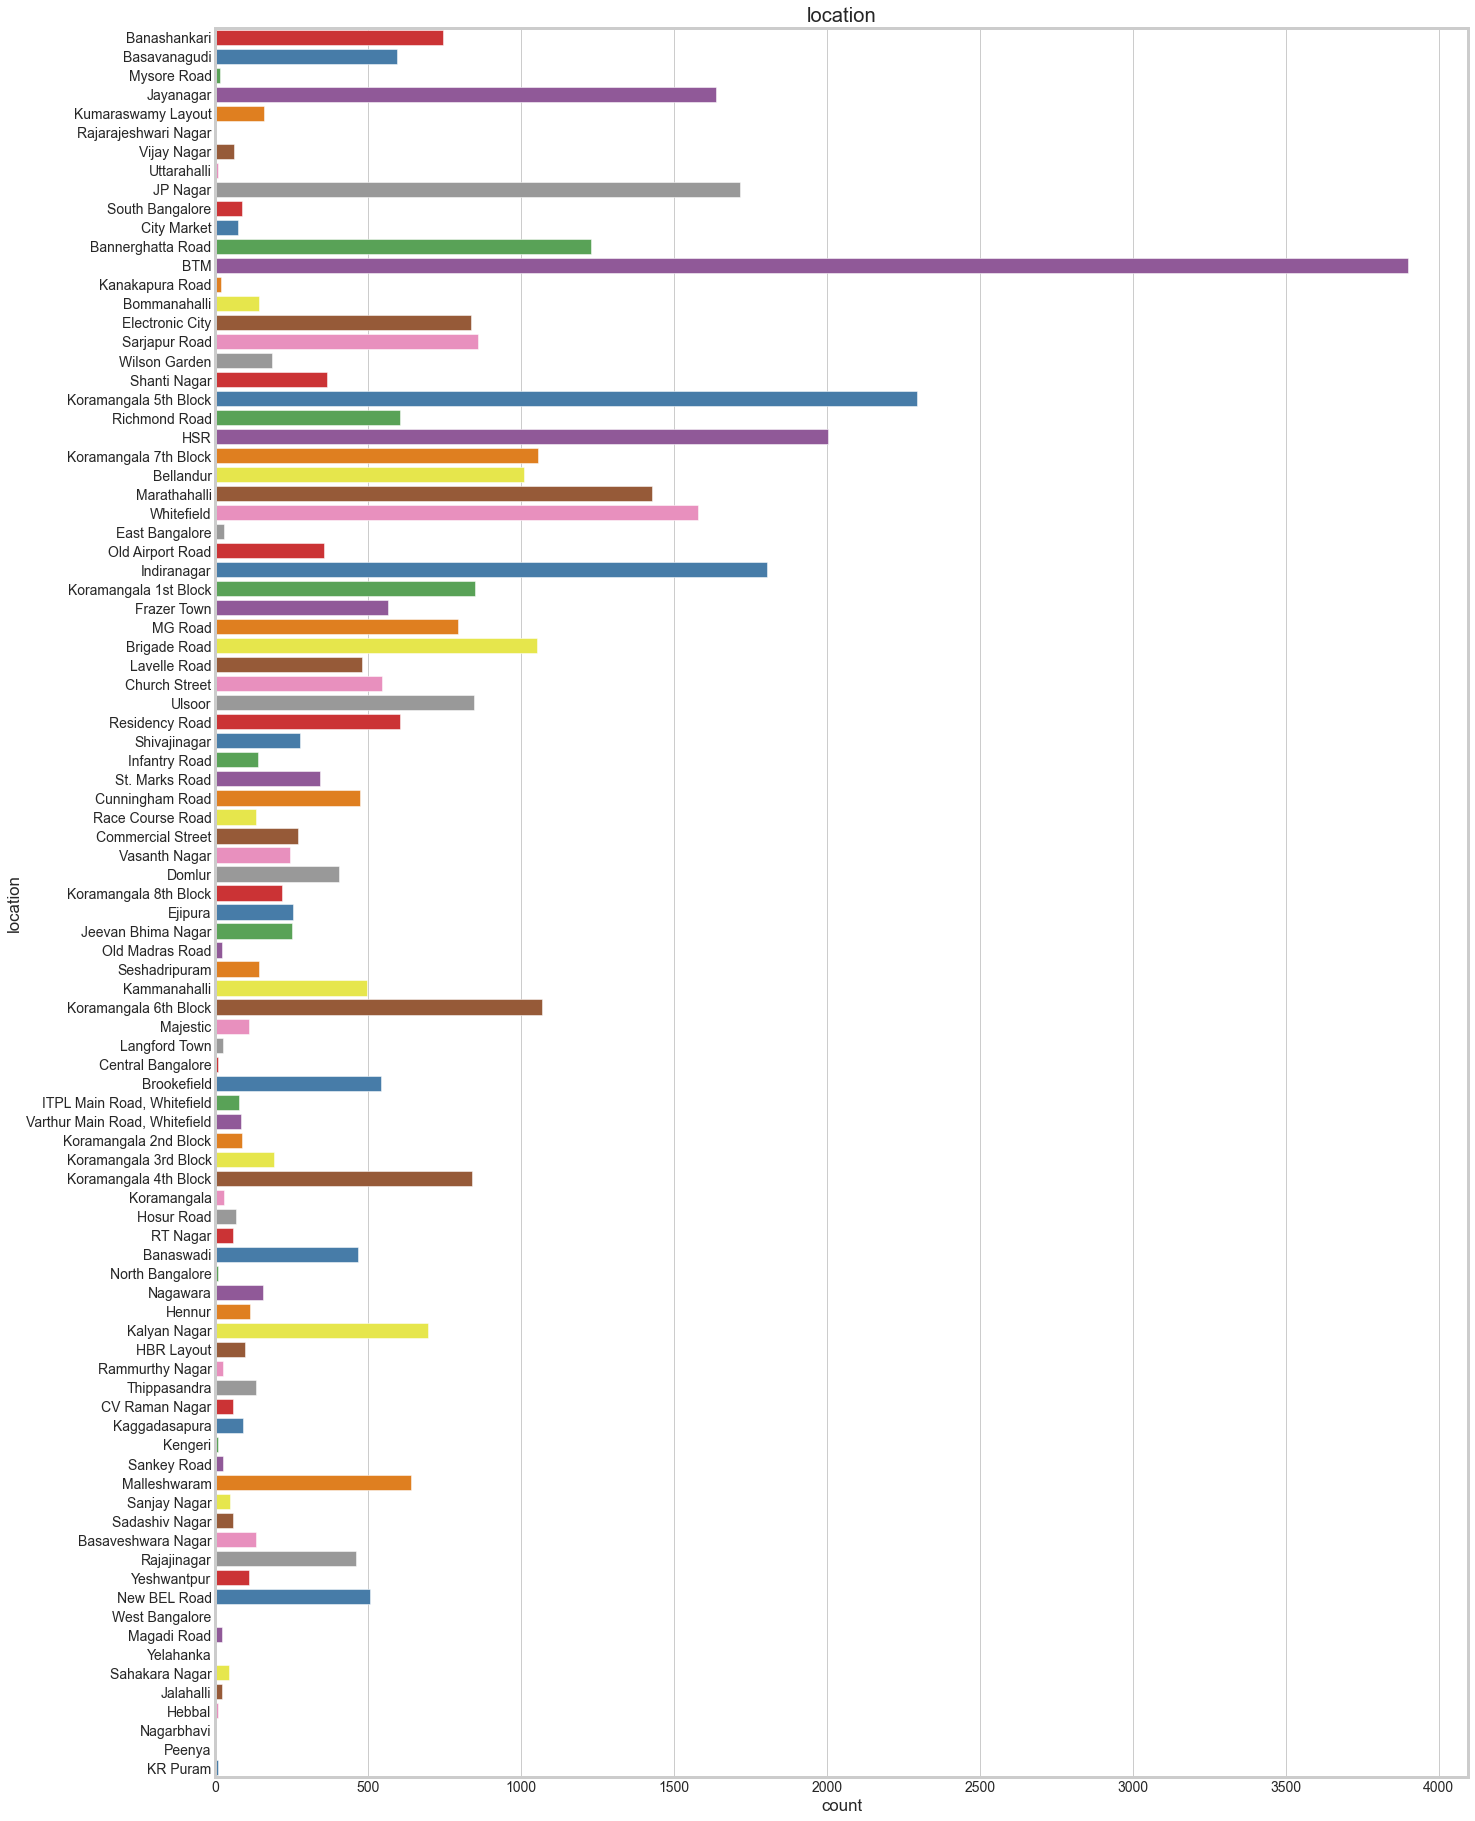

In [48]:
mpl.figure(figsize = (20,30))
sb.countplot(y="location",data=df, palette = "Set1") 
mpl.title('location')
mpl.show()

## Which are the most popular cuisines of Banglore?

In [49]:
df.cuisines.value_counts()

North Indian                        2117
North Indian, Chinese               1971
South Indian                        1231
Cafe                                 620
Bakery, Desserts                     613
                                    ... 
Oriya, North Indian                    1
North Indian, Street Food, Pizza       1
Coffee, Street Food                    1
Desserts, North Indian, Chinese        1
Beverages, South Indian                1
Name: cuisines, Length: 2377, dtype: int64

In [50]:
df.cuisines.nunique()

2377

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


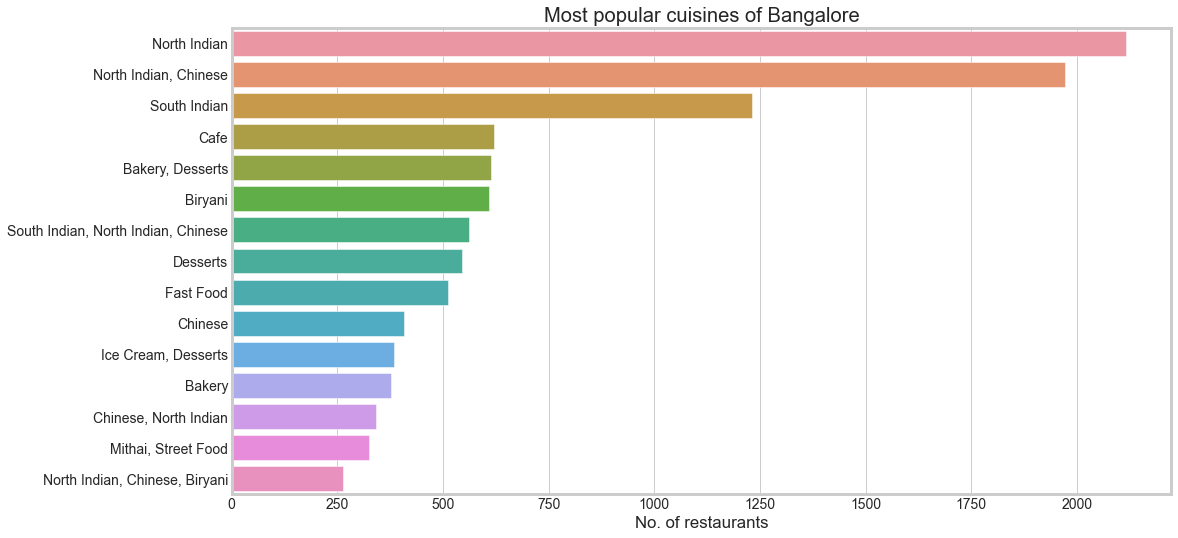

In [51]:
mpl.figure(figsize=(15,8))
cuisines=df['cuisines'].value_counts()[:15]
sb.barplot(cuisines,cuisines.index)
mpl.title('Most popular cuisines of Bangalore')
mpl.xlabel('No. of restaurants')
mpl.show()

## Distribution of the cost Vs ratings in parallel with online order

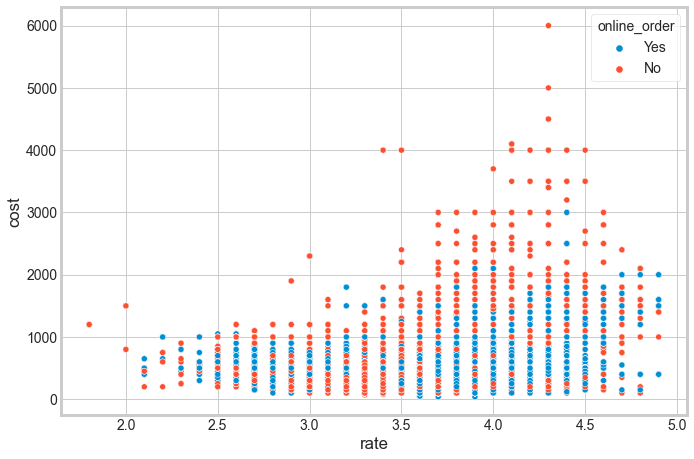

In [52]:
mpl.figure(figsize=(10,7))
sb.scatterplot(x="rate",y='cost',hue='online_order',data=df)
mpl.show()

## Plotting the counts with the help of pie chart

In [53]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [54]:
df['rate'].min()

1.8

In [55]:
df['rate'].max()

4.9

In [56]:
((df['rate']>=1) & (df['rate']<2)).sum()

5

In [57]:
((df['rate']>=2) & (df['rate']<3)).sum()

2244

In [58]:
((df['rate']>=3) & (df['rate']<4)).sum()

26831

In [59]:
(df['rate']>=4).sum()

12301

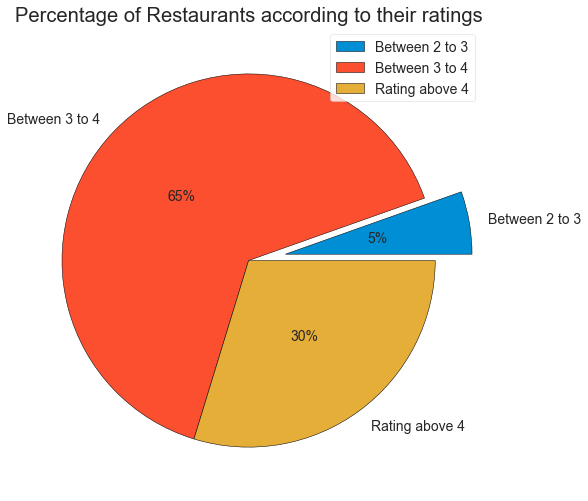

In [60]:
mpl.figure(figsize=(10,8))
slices=[((df['rate']>=2) & (df['rate']<3)).sum(),
        ((df['rate']>=3) & (df['rate']<4)).sum(),
        (df['rate']>=4).sum()]

labels=['Between 2 to 3','Between 3 to 4','Rating above 4']

mpl.pie(slices, labels=labels,
        wedgeprops={'edgecolor':'black'},
        autopct='%1.0f%%', 
        explode = [0.2,0,0],
        pctdistance=.5)

mpl.title("Percentage of Restaurants according to their ratings")

mpl.legend()
mpl.show()

## Services Types

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


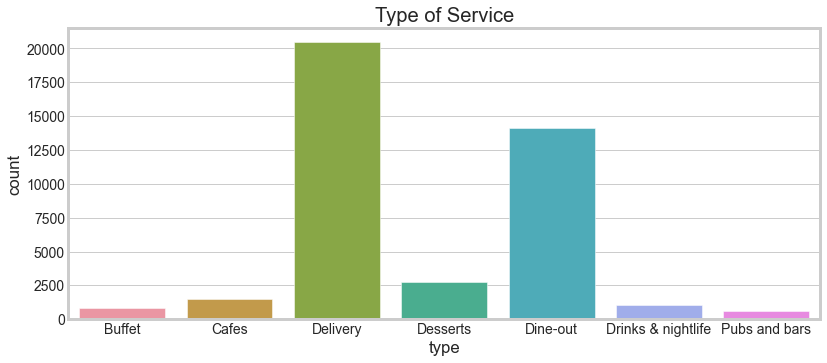

In [61]:
mpl.figure(figsize=(12,5))
sb.countplot(df['type'])
mpl.title('Type of Service')
mpl.show()

In [62]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [63]:
df.reviews_list.value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

Encode categorical data into numerical data 

we can divided in to two forms
==> ordinal data -> Label Encoding, Factorize()
The ordinal data having a sequence or Order like we have to take example for pizza taste 
1) worst 
2) average
3)excellent

==> nominal data -> get_dummies(), sklearn(OneHotEncoding), Count Encoding
The nominal data which is not having any sequence or Order like we have to take example for city names  

## Count Encoding
Count encoding replaces each categorical value with the number of times it appears in the dataset

In [64]:
df.name.value_counts().to_dict()

{'Cafe Coffee Day': 86,
 'Onesta': 85,
 'Empire Restaurant': 69,
 'Five Star Chicken': 68,
 'Kanti Sweets': 68,
 'Just Bake': 67,
 'Baskin Robbins': 62,
 'Petoo': 60,
 'Pizza Hut': 60,
 'KFC': 60,
 'Smoor': 59,
 'Subway': 59,
 "Domino's Pizza": 59,
 "McDonald's": 59,
 'Polar Bear': 58,
 'Sweet Truth': 58,
 'Beijing Bites': 56,
 'Faasos': 56,
 'Burger King': 55,
 "Smally's Resto Cafe": 54,
 'Keventers': 54,
 'Corner House Ice Cream': 52,
 'Rolls On Wheels': 51,
 'Ambur Hot Dum Biryani': 51,
 'Frozen Bottle': 50,
 'A2B - Adyar Ananda Bhavan': 50,
 'Chung Wah': 50,
 'Pizza Stop': 50,
 'Tata Cha': 49,
 'Lassi Shop': 49,
 'California Burrito': 48,
 'Chai Point': 48,
 'Sweet Chariot': 48,
 "Mani's Dum Biryani": 47,
 'eat.fit': 47,
 'Goli Vada Pav No. 1': 46,
 'Gelato Italiano': 46,
 'Mainland China': 45,
 'Krispy Kreme': 45,
 'Lakeview Milkbar': 45,
 "Chef Baker's": 44,
 'New Prashanth Hotel': 44,
 'Hammered': 44,
 'The French Loaf': 44,
 'Truffles': 43,
 'Oye Amritsar': 43,
 'Natural Ice Cr

In [65]:
df_freq = df.name.value_counts().to_dict()

In [66]:
df.name = df.name.map(df_freq)

In [67]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,11,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,4,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,11,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,2,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [68]:
df_freq1 = df.location.value_counts().to_dict()

In [69]:
df.location = df.location.map(df_freq1)

In [70]:
df_freq2 = df.rest_type.value_counts().to_dict()

In [71]:
df.rest_type = df.rest_type.map(df_freq2)

In [72]:
df_freq3 = df.cuisines.value_counts().to_dict()

In [73]:
df.cuisines = df.cuisines.map(df_freq3)

In [74]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,11,Yes,Yes,4.1,775,744,9607,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",89,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,4,Yes,No,4.1,787,744,9607,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",8,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,11,Yes,No,3.8,918,744,173,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",11,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,2,No,No,3.7,88,744,13866,Masala Dosa,220,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,No,No,3.8,166,595,9607,"Panipuri, Gol Gappe",8,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Label Encoding
The label encoding we replace the categorical value with a numeric value. if the categorical variable value contains 5 distinct classes,we use (0,1,2,3,and4).

In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [76]:
def Encode(df):
    for column in df.columns[~df.columns.isin(['rate','cost','votes','name','location','rest_type','cuisines'])]:
        df[column] = le.fit_transform(df[column])
    return df

df_zomato = Encode(df.copy())


In [77]:
df_zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,11,1,1,4.1,775,744,9607,3622,89,800.0,10220,8270,0,1
1,4,1,0,4.1,787,744,9607,2939,8,800.0,11856,8270,0,1
2,11,1,0,3.8,918,744,173,1403,11,800.0,4305,8270,0,1
3,2,0,0,3.7,88,744,13866,2741,220,300.0,8717,8270,0,1
4,4,0,0,3.8,166,595,9607,3426,8,600.0,14697,8270,0,1


# Feature Importance

## Correlation

It is a square matrix In this correlation each row represents a variable,and all the columns represent the same variables as rows Hence the Number of Rows = Number of Columns It is Symmetric Matrix - this makes sense because the correlation between a,b will be the same as that between b,a. All diagonal elements are 1.

In [78]:
df_zomato.corr()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
name,1.000000,0.169009,0.033384,0.146645,0.169628,0.000062,-0.139269,-0.096692,-0.114601,0.023646,-0.024503,-0.114920,-0.048196,0.000439
online_order,0.169009,1.000000,-0.054970,0.069502,-0.013227,0.093546,0.104034,-0.007831,-0.021987,-0.175509,-0.064171,-0.360238,-0.239313,-0.054607
book_table,0.033384,-0.054970,1.000000,0.426116,0.393645,-0.048827,-0.212049,-0.102204,-0.118192,0.614338,0.051978,0.041741,0.113959,0.025924
rate,0.146645,0.069502,0.426116,1.000000,0.434728,-0.018132,-0.230952,-0.158089,-0.182203,0.385012,0.245152,-0.046307,0.033497,0.018653
votes,0.169628,-0.013227,0.393645,0.434728,1.000000,0.006170,-0.174198,-0.155054,-0.109139,0.366669,0.042313,0.001462,0.070274,0.021286
location,0.000062,0.093546,-0.048827,-0.018132,0.006170,1.000000,0.048006,0.006056,0.008282,-0.113420,-0.042995,-0.069090,-0.057229,-0.147192
rest_type,-0.139269,0.104034,-0.212049,-0.230952,-0.174198,0.048006,1.000000,0.085286,0.179104,-0.319509,-0.051623,-0.010852,0.010383,-0.021580
dish_liked,-0.096692,-0.007831,-0.102204,-0.158089,-0.155054,0.006056,0.085286,1.000000,0.049192,-0.119355,0.002219,0.017125,-0.040077,-0.020955
cuisines,-0.114601,-0.021987,-0.118192,-0.182203,-0.109139,0.008282,0.179104,0.049192,1.000000,-0.150259,-0.024608,0.031642,0.000265,-0.009953
cost,0.023646,-0.175509,0.614338,0.385012,0.366669,-0.113420,-0.319509,-0.119355,-0.150259,1.000000,0.043502,0.076736,0.185336,0.056159


<AxesSubplot:>

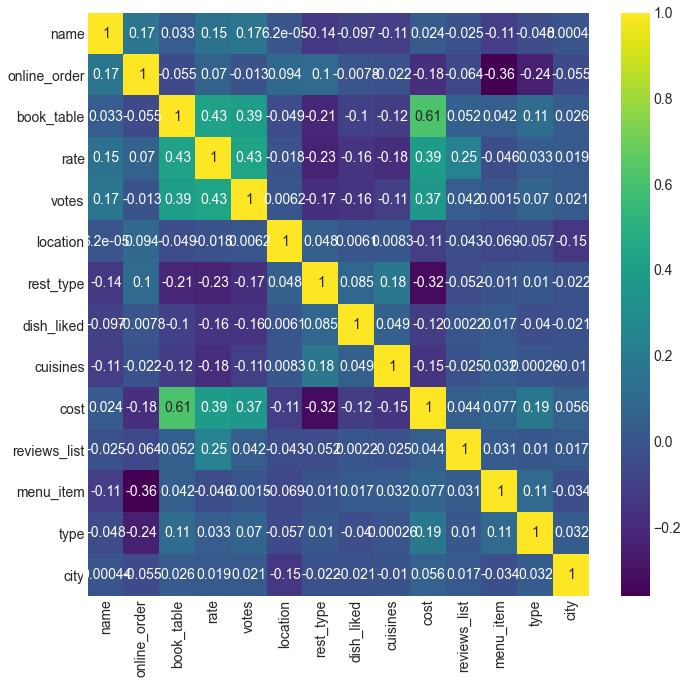

In [79]:
mpl.figure(figsize = (10,10))
sb.heatmap(df_zomato.corr(), cmap='viridis', annot=True)

In [80]:
df_zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,11,1,1,4.1,775,744,9607,3622,89,800.0,10220,8270,0,1
1,4,1,0,4.1,787,744,9607,2939,8,800.0,11856,8270,0,1
2,11,1,0,3.8,918,744,173,1403,11,800.0,4305,8270,0,1
3,2,0,0,3.7,88,744,13866,2741,220,300.0,8717,8270,0,1
4,4,0,0,3.8,166,595,9607,3426,8,600.0,14697,8270,0,1


In [81]:
my_data = df_zomato.iloc[:,[0,1,2,3,4,5,6,8,9,11]]

# Identifying X and Y values

In [82]:
x = df_zomato.iloc[:,[0,1,2,4,5,6,8,9,11]]

In [83]:
x.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,11,1,1,775,744,9607,89,800.0,8270
1,4,1,0,787,744,9607,8,800.0,8270
2,11,1,0,918,744,173,11,800.0,8270
3,2,0,0,88,744,13866,220,300.0,8270
4,4,0,0,166,595,9607,8,600.0,8270


In [84]:
y = df_zomato['rate']
y

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51709    3.7
51711    2.5
51712    3.6
51715    4.3
51716    3.4
Name: rate, Length: 41381, dtype: float64

In [85]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [86]:
model.feature_importances_

array([0.11135848, 0.02152706, 0.17796595, 0.31427218, 0.09740684,
       0.06476003, 0.09743965, 0.10269914, 0.01257066])

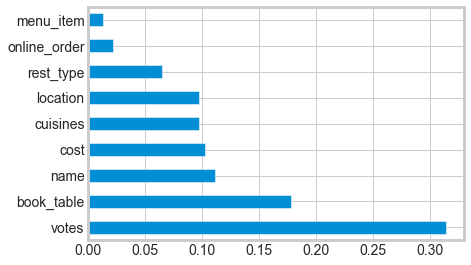

In [87]:
feat_imp = pd.Series(model.feature_importances_, index=x.columns)
feat_imp.nlargest(10).plot(kind='barh')
mpl.show()

# Splitting the dataset into train and test

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [89]:
x_train

,name,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
5949,69,1,0,2090,1052,9607,56,750.0,318
39987,2,1,0,9,60,1278,26,400.0,7931
14194,2,1,0,23,838,9607,6,500.0,8270
39864,8,0,0,17,641,1850,545,400.0,8270
21199,36,1,0,70,1636,13866,112,400.0,8270
...,...,...,...,...,...,...,...,...,...
49948,9,1,0,23,1011,9607,409,800.0,3377
35155,38,1,0,2627,2296,144,33,500.0,1135
36680,10,0,1,7870,841,76,10,1800.0,8270
49950,5,1,0,17,1011,13866,1971,400.0,8270


In [90]:
x_test

,name,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
11076,15,1,0,7,2004,13866,139,300.0,8270
40338,4,0,1,409,135,9607,113,1200.0,8270
36873,11,1,0,277,191,3368,620,500.0,229
8592,18,1,0,101,1228,1850,384,400.0,8270
13610,2,1,0,45,838,78,1971,500.0,8270
...,...,...,...,...,...,...,...,...,...
27969,12,0,0,6,3900,13866,1971,400.0,8270
41757,4,1,0,22,1428,13866,2117,300.0,8270
35779,15,1,0,34,1067,346,44,250.0,8270
49545,42,0,0,393,860,1850,50,200.0,8270


# Evaluating The Models

In [91]:
# Linear Regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [92]:
y_pred = lr.predict(x_test)
y_pred

array([3.5702352 , 3.92710131, 3.70972082, ..., 3.66651688, 3.64866627,
       3.67692762])

In [93]:
from sklearn.metrics import r2_score
r2_scoreLR = r2_score(y_test,y_pred)
r2_scoreLR

0.30467371948393407

## Support Vector Regression

In [94]:
# Support Vector Regression

from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)

# Prediction
y_pred = svr.predict(x_test)
y_pred

# Score
from sklearn.metrics import r2_score
r2_scoreSVR = r2_score(y_test,y_pred)
r2_scoreSVR

0.3534894348671729

## RandomForestRegressor

In [95]:
# RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=650,random_state=245, min_samples_leaf=.0001)
rf.fit(x_train,y_train)

# Prediction
y_pred = rf.predict(x_test)
y_pred

# Score
from sklearn.metrics import r2_score
r2_scoreRF = r2_score(y_test,y_pred)
r2_scoreRF

0.8802631684065145

## DecisionTreeRegressor

In [96]:
# DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=10)
dtr.fit(x_train,y_train)

# Prediction
y_pred = dtr.predict(x_test)
y_pred

# Score
from sklearn.metrics import r2_score
r2_scoreDT = r2_score(y_test,y_pred)
r2_scoreDT

0.8628778539136829

## ExtraTreesRegressor

In [97]:
# ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor(n_estimators = 120)
et.fit(x_train,y_train)

# Prediction
y_pred = et.predict(x_test)
y_pred

# Score
from sklearn.metrics import r2_score
r2_scoreET = r2_score(y_test,y_pred)
r2_scoreET

0.9314894804770238

# DataFrame For All Regressor Models & R2 Score

In [98]:
pd.DataFrame({'Name Of The Model':['LR','DTR','RFR','ETR','SVR'],'R2 Score':
               [r2_scoreLR,r2_scoreDT,r2_scoreRF,r2_scoreET,r2_scoreSVR]})

,Name Of The Model,R2 Score
0,LR,0.304674
1,DTR,0.862878
2,RFR,0.880263
3,ETR,0.931489
4,SVR,0.353489


# Hyper Parameter Tuning Using GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

svr = SVR()

parameters = {"kernel":['linear', 'poly', 'rbf'], 
              'C':[0.001,0.01,0.1,1,10],
              'degree':[1,2,3,4,5,6,7], 
              'gamma':[0.001,0.1,1,2,5,10,100]}

gv = GridSearchCV(svr, parameters, cv=5, scoring='accuracy') 
gv.fit(x_train,y_train)

# Serialization

In [99]:
import pickle
pickle.dump(et,open('model.pkl', 'wb'))
model = pickle.load(open('model.pkl', 'rb'))

## Deployment




### MNC Servers --> application, data, security, os

### IAAS - Infrastructure as a service -->AWS, AZURE, GOOGLE CLOUD

### PAAS - Platform as a service --> Heroku, Flask